<a href="https://colab.research.google.com/github/Bibhuti-MLAI/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [62]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [63]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#Import the data
data = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction - Bibhuti Bhusan Sahu/SeoulBikeData.csv',encoding = 'unicode_escape')

In [65]:
data.shape

(8760, 14)

# The dataset contains 8760 records and 14 features

In [66]:
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [67]:
#top 5 records of the data
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [68]:
#Bottom 5 records of the data
data.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [69]:
#Brief description of the data
data.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,05/02/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [70]:
#Counting the null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [71]:
#extracting year
day = data["Date"].values
day = [str.split("/")[0] for str in day]
data["day"]=day

In [72]:
#Spliting the date feature to date and month and storing them in different variable
month = data["Date"].values
month = [strm.split("/")[1] for strm in month]
data["month"] = month

In [73]:
#Droping the date column
data.drop('Date', axis=1, inplace=True)

In [74]:
#Getting the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   objec

In [75]:
#Type casting the hour feature
data['Hour']=data['Hour'].astype('O')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   objec

In [77]:
#Rename the complex columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [78]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekdays_weekend']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [79]:
data['weekdays_weekend'].value_counts()

0    8760
Name: weekdays_weekend, dtype: int64

In [80]:
data.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,0


## **Exploratory data analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


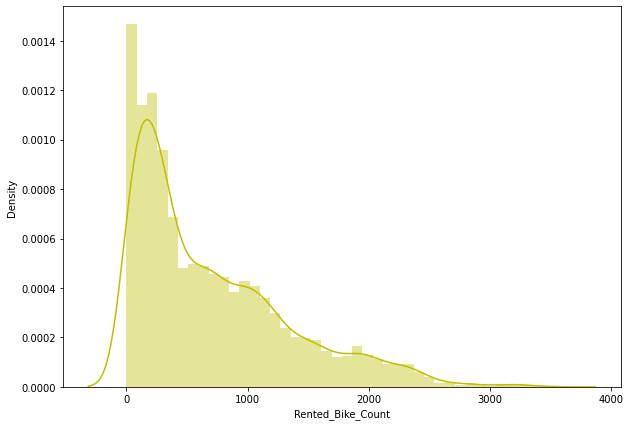

In [81]:
# Dependent variable 'Rented_Bike_Count'
plt.figure(figsize=(10,7))
sns.distplot(data['Rented_Bike_Count'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


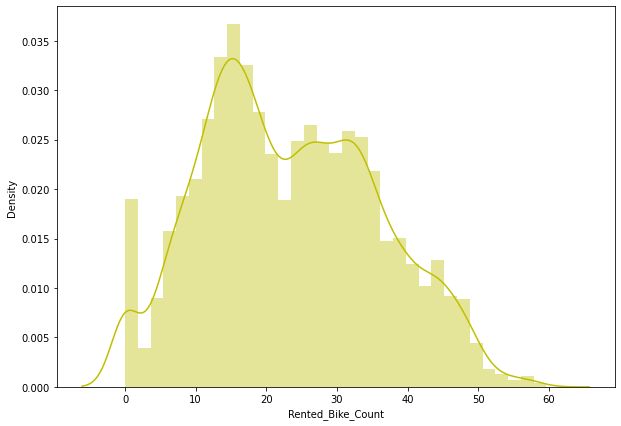

In [82]:
# Dependent variable 'Price'
plt.figure(figsize=(10,7))
sns.distplot(np.sqrt(data['Rented_Bike_Count']),color="y")

In [83]:
#List of categorical features
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of categorical variables: ', len(categorical_features))
categorical_features

Number of categorical variables:  6


['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'day', 'month']

In [84]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  10


['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'weekdays_weekend']

In [85]:
#Understanding the numerical features
df_num=data.drop(categorical_features,axis=1)

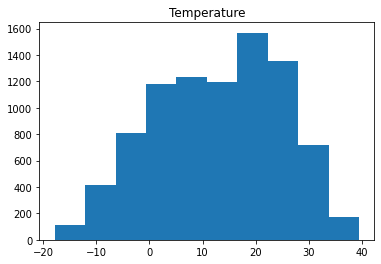

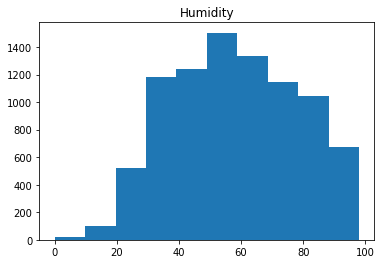

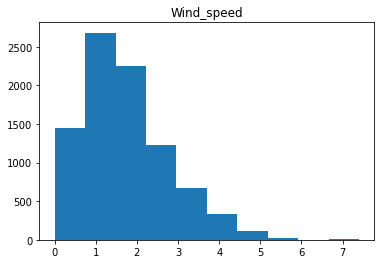

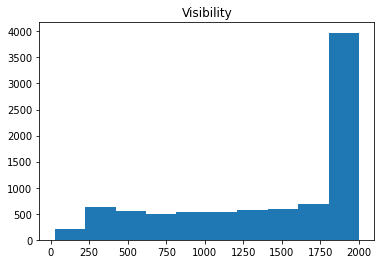

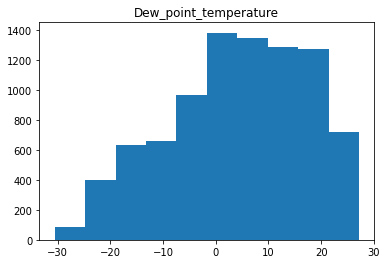

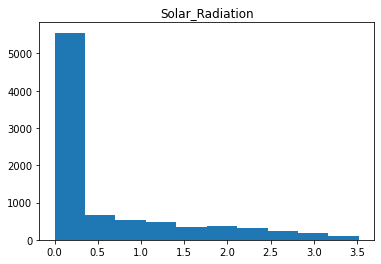

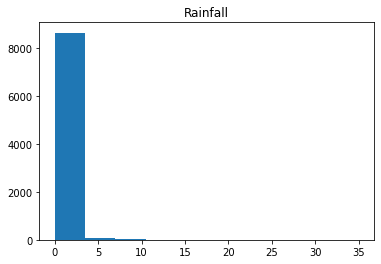

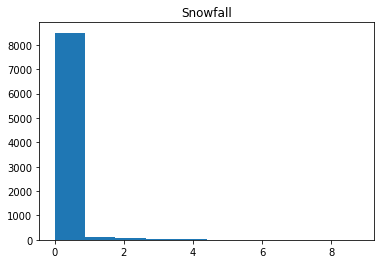

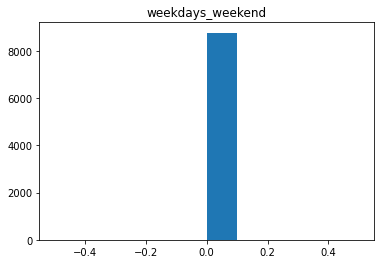

In [86]:
for cols in df_num.columns[1:]:
    plt.hist(df_num[cols])
    plt.title(cols)
    plt.show()

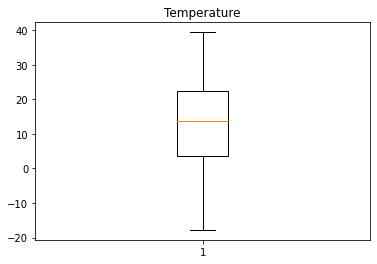

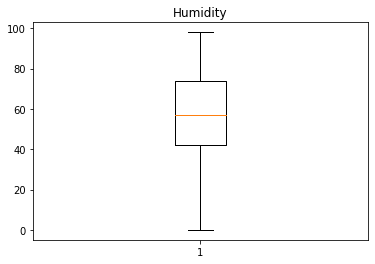

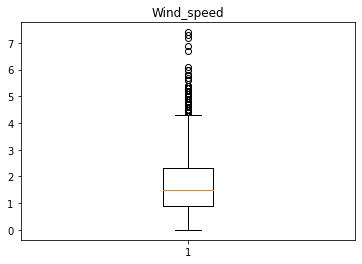

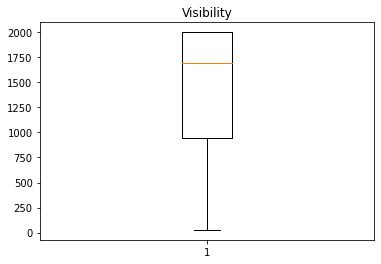

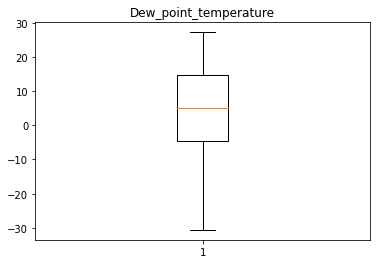

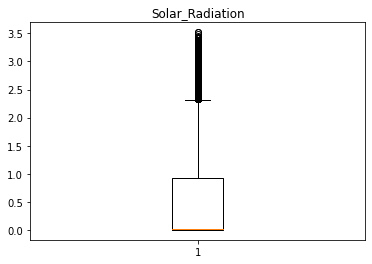

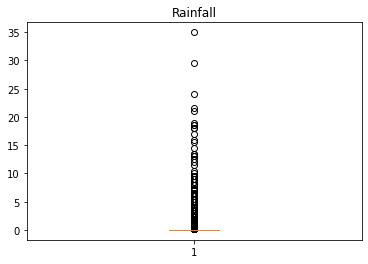

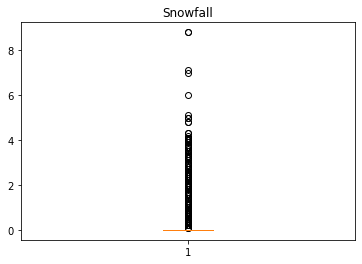

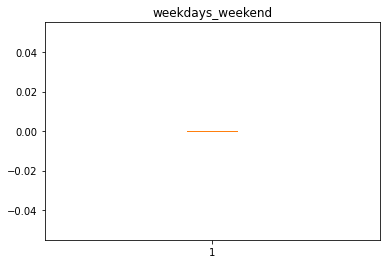

In [87]:
for cols in df_num.columns[1:]:
    plt.boxplot(df_num[cols])
    plt.title(cols)
    plt.show()

In [88]:
data_copy = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

#cols = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month','weekdays_weekend']
for col in categorical_features:
    data_copy = one_hot_encoding(data_copy, col)
data_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,weekdays_weekend,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
print(data_copy.shape)

(8760, 79)


# **Model Building**

In [90]:
#Splitting the dependent and independent features
x = data_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = data_copy['Rented_Bike_Count']

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(x))
print(x)

MinMaxScaler(copy=True, feature_range=(0, 1))
      Temperature  Humidity  Wind_speed  ...  month_10  month_11  month_12
0            -5.2        37         2.2  ...         0         0         1
1            -5.5        38         0.8  ...         0         0         1
2            -6.0        39         1.0  ...         0         0         1
3            -6.2        40         0.9  ...         0         0         1
4            -6.0        36         2.3  ...         0         0         1
...           ...       ...         ...  ...       ...       ...       ...
8755          4.2        34         2.6  ...         0         1         0
8756          3.4        37         2.3  ...         0         1         0
8757          2.6        39         0.3  ...         0         1         0
8758          2.1        41         1.0  ...         0         1         0
8759          1.9        43         1.3  ...         0         1         0

[8760 rows x 78 columns]


In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 78)
(2190, 78)


# Regression models

In [93]:
#Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print("The regrssion score is :")
print(reg.score(x_train, y_train))
print("\nThe regression coefficients are :")
print(reg.coef_)
print("\nThe length of regression coefficients are :")
print(len(reg.coef_))
print("\nThe intercept is :")
print(reg.intercept_)

The regrssion score is :
0.7004691980338853

The regression coefficients are :
[ 1.59954177e+01 -8.69906960e+00  8.85666309e+00  6.14021904e-02
  1.17908488e+01  5.52703509e+01 -5.35733497e+01  2.55084953e+01
 -2.53874903e+11 -9.40593725e+01 -2.13697555e+02 -2.76362578e+02
 -3.45317921e+02 -3.30812864e+02 -1.49682862e+02  1.41905728e+02
  4.81198143e+02  5.68427346e+01 -1.80496916e+02 -1.98920142e+02
 -1.51579090e+02 -1.63336782e+02 -1.64052827e+02 -7.80017337e+01
  5.83720022e+01  3.05243433e+02  7.68674595e+02  5.01720236e+02
  4.28002048e+02  4.10176683e+02  3.32552309e+02  9.82861656e+01
 -1.97208244e+11 -2.18870880e+10 -1.92765225e+11  1.49888702e+02
  9.17566032e+02 -8.61585999e+01 -1.58851819e+01  2.07105999e+01
 -6.85550690e+01  8.28791809e+01  2.65043259e+01 -1.42210178e+01
  8.81336212e+00  9.08082008e+00  2.63389664e+01  2.46425285e+01
  1.12133438e+02  2.19507370e+01 -1.47719879e+01  1.59138489e+01
  3.40657501e+01 -2.49930267e+01 -1.72730637e+00 -1.90608406e+00
 -7.9791717

In [94]:
y_pred = reg.predict(x_test)
y_pred

array([ 431.77999878,  679.13516235,  633.92044067, ..., 1582.04620361,
         12.79159546, 1130.69088745])

In [95]:
#Grtting the scores
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE= mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_pred)
print("MAE :",MAE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
print("R2 :",r2)

MSE : 124610.20697769964
RMSE : 353.0017095960013
MAE : 267.2725734902299
R2 : 0.7012531873171679


# **Lasso Regression**

In [96]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
# Fit the Lasso model
lasso.fit(x_train, y_train)
# Create the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))

0.6992637330894962 0.6966364519068533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1373380.134438157, tolerance: 273018.75028098933
  positive)


In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329811908.6508834, tolerance: 222341.66737983265
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326709638.0797216, tolerance: 216512.59041575337
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327414652.272134, tolerance: 219635.41268217284
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322287309.

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso

In [ ]:
MSE_Lasso  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE_Lasso :" , MSE_Lasso)

RMSE_Lasso = np.sqrt(MSE_Lasso)
print("RMSE_Lasso :" ,RMSE_Lasso)

MAE_Lasso= mean_absolute_error(y_test, y_pred_lasso)
print("MAE_Lasso :",MAE_Lasso)

R2_Lasso = r2_score((y_test), (y_pred_lasso))
print("R2_Lasso :" ,R2_Lasso)

In [ ]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# **Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge

In [109]:
MSE_Ridge  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE_Ridge :" , MSE_Ridge)

RMSE_Ridge = np.sqrt(MSE_Ridge)
print("RMSE_Ridge :" ,RMSE_Ridge)

MAE_Ridge= mean_absolute_error(y_test, y_pred_ridge)
print("MAE_Ridge :",MAE_Ridge)

R2_Ridge = r2_score((y_test),(y_pred_ridge))
print("R2_Ridge :" ,R2_Ridge)

MSE_Ridge : 124619.3770277133
RMSE_Ridge : 353.01469803354263
MAE_Ridge : 267.2690506245309
R2_Ridge : 0.7012312025754668


In [ ]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# **Random forest**

In [97]:
# Create the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
# Making predictions on train and test data

y_pred_train = rf_model.predict(x_train)
y_pred_rf = rf_model.predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error
MSE_RF= mean_squared_error(y_test, y_pred_rf)
print("MSE_RF :",MSE_RF)

RMSE_RF=np.sqrt(MSE_RF)
print("RMSE_RF :",RMSE_RF)


MAE_RF= mean_absolute_error(y_test, y_pred_rf)
print("MAE_RF :",MAE_RF)

from sklearn.metrics import r2_score
R2_RF= r2_score((y_test), (y_pred_rf))
print("R2_RF :",R2_RF)

MSE_RF : 57289.93030589041
RMSE_RF : 239.35314977223595
MAE_RF : 143.5730913242009
R2_RF : 0.862650223502403


Text(0, 0.5, 'Predicted')

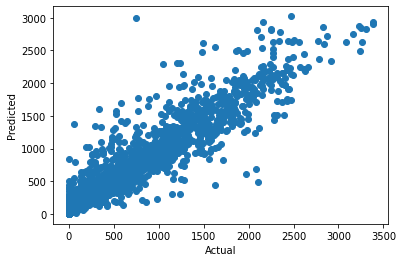

In [100]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## **Xgboost**

In [101]:
import xgboost as xg
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [102]:
# Fitting the model
xgb_r.fit(x_train,y_train)
  
# Predict the model
ypred_xgb = xgb_r.predict(x_test)

[17:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
from sklearn.metrics import mean_squared_error
MSE_XGB= mean_squared_error(y_test, ypred_xgb)
print("MSE_XGB :",MSE_XGB)


RMSE_XGB=np.sqrt(MSE_XGB)
print("RMSE_XGB :",RMSE_XGB)


MAE_XGB= mean_absolute_error(y_test, ypred_xgb)
print("MAE_XGB :",MAE_XGB)

from sklearn.metrics import r2_score
R2_XGB= r2_score((y_test), (ypred_xgb))
print("R2_XGB :",R2_XGB)

MSE_XGB : 275503.18120307114
RMSE_XGB : 524.8839692761355
MAE_XGB : 353.41165282018653
R2_XGB : 0.3394947391177373


Text(0, 0.5, 'Predicted')

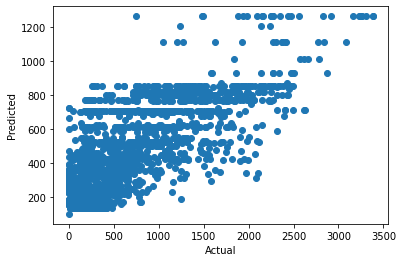

In [104]:
plt.scatter(y_test, ypred_xgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Gradient Boosting

In [105]:
# Create an instance of the GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
# Making predictions on train and test data

y_pred_train = gb_model.predict(x_train)
y_pred_gb = gb_model.predict(x_test)

In [107]:
from sklearn.metrics import mean_squared_error
MSE_GB= mean_squared_error(y_test, y_pred_gb)
print("MSE_GB :",MSE_GB)

RMSE_GB=np.sqrt(MSE_GB)
print("RMSE_GB :",RMSE_GB)


MAE_GB= mean_absolute_error(y_test, y_pred_gb)
print("MAE_GB :",MAE_GB)


from sklearn.metrics import r2_score
R2_GB= r2_score(y_test, y_pred_gb)
print("R2_GB :",R2_GB)
print("Adjusted_R2_GB :",1-(1-r2_score(y_test, y_pred_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )


MSE_GB : 77536.48052775441
RMSE_GB : 278.4537313949203
MAE_GB : 197.7549594034123
R2_GB : 0.8141101199803278
Adjusted_R2_GB : 0.8072416165973176


Text(0, 0.5, 'Predicted')

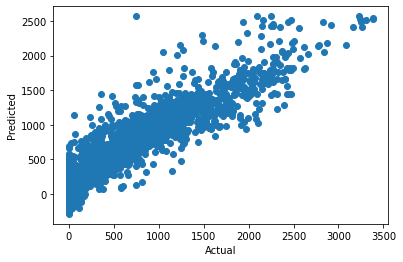

In [108]:
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# **Conclusion**

# From all the above r squared and adjusted r squared values,The best fit model can be taken as random forest r squared value i.e 0.86.